In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
sns.set_theme(color_codes=True)             
pd.set_option('display.max_columns', None)  
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score,classification_report,roc_auc_score,roc_curve
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay

In [2]:
df=pd.read_csv("C:\\Users\\abhin\\Downloads\\train.csv")
test=pd.read_csv("C:\\Users\\abhin\\Downloads\\test_QoiMO9B.csv")

In [3]:
df1=pd.read_csv("C:\\Users\\abhin\\Downloads\\fulfilment_center_info.csv")

In [4]:
df2=pd.merge(df,df1,on='center_id')
test_df=pd.merge(test,df1,on='center_id')
test_df.count()

id                       32573
week                     32573
center_id                32573
meal_id                  32573
checkout_price           32573
base_price               32573
emailer_for_promotion    32573
homepage_featured        32573
city_code                32573
region_code              32573
center_type              32573
op_area                  32573
dtype: int64

In [5]:
df3=pd.read_csv("C:\\Users\\abhin\\Downloads\\meal_info.csv")
df3.head()

,meal_id,category,cuisine
0,1885,Beverages,Thai
1,1993,Beverages,Thai
2,2539,Beverages,Thai
3,1248,Beverages,Indian
4,2631,Beverages,Indian


In [6]:
dff=pd.merge(df2,df3,on='meal_id')
test_dff=pd.merge(test_df,df3,on='meal_id')


In [7]:
dff

,id,week,center_id,meal_id,checkout_price,base_price,emailer_for_promotion,homepage_featured,num_orders,city_code,region_code,center_type,op_area,category,cuisine
0,1379560,1,55,1885,136.83,152.29,0,0,177,647,56,TYPE_C,2.0,Beverages,Thai
1,1018704,2,55,1885,135.83,152.29,0,0,323,647,56,TYPE_C,2.0,Beverages,Thai
2,1196273,3,55,1885,132.92,133.92,0,0,96,647,56,TYPE_C,2.0,Beverages,Thai
3,1116527,4,55,1885,135.86,134.86,0,0,163,647,56,TYPE_C,2.0,Beverages,Thai
4,1343872,5,55,1885,146.50,147.50,0,0,215,647,56,TYPE_C,2.0,Beverages,Thai
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
456543,1437396,141,61,2104,583.03,630.53,0,1,13,473,77,TYPE_A,4.5,Fish,Continental
456544,1060716,142,61,2104,581.03,582.03,0,0,42,473,77,TYPE_A,4.5,Fish,Continental
456545,1029231,143,61,2104,583.03,581.03,0,0,40,473,77,TYPE_A,4.5,Fish,Continental
456546,1141147,144,61,2104,582.03,581.03,0,0,53,473,77,TYPE_A,4.5,Fish,Continental


In [8]:
dff.isnull().sum()

id                       0
week                     0
center_id                0
meal_id                  0
checkout_price           0
base_price               0
emailer_for_promotion    0
homepage_featured        0
num_orders               0
city_code                0
region_code              0
center_type              0
op_area                  0
category                 0
cuisine                  0
dtype: int64

In [9]:
dff.nunique()

id                       456548
week                        145
center_id                    77
meal_id                      51
checkout_price             1992
base_price                 1907
emailer_for_promotion         2
homepage_featured             2
num_orders                 1250
city_code                    51
region_code                   8
center_type                   3
op_area                      30
category                     14
cuisine                       4
dtype: int64

In [10]:
shape=dff.shape
shape

(456548, 15)

In [11]:
dtypes=dff.dtypes
dtypes

id                         int64
week                       int64
center_id                  int64
meal_id                    int64
checkout_price           float64
base_price               float64
emailer_for_promotion      int64
homepage_featured          int64
num_orders                 int64
city_code                  int64
region_code                int64
center_type               object
op_area                  float64
category                  object
cuisine                   object
dtype: object

In [12]:
index=dff.index
index

RangeIndex(start=0, stop=456548, step=1)

In [13]:
dff['emailer_for_promotion'].value_counts()

emailer_for_promotion
0    419498
1     37050
Name: count, dtype: int64

In [14]:
dff['homepage_featured'].value_counts()

homepage_featured
0    406693
1     49855
Name: count, dtype: int64

In [15]:
col=['id']
dff.drop(col,axis=1,inplace=True)

In [16]:
# seperate categorical and numerical columns
num=dff.select_dtypes(include=['number']).columns
cat=dff.select_dtypes(include=['object', 'category']).columns
print('Cat:',cat)
print('num:',num)

Cat: Index(['center_type', 'category', 'cuisine'], dtype='object')
num: Index(['week', 'center_id', 'meal_id', 'checkout_price', 'base_price',
       'emailer_for_promotion', 'homepage_featured', 'num_orders', 'city_code',
       'region_code', 'op_area'],
      dtype='object')


In [17]:
dff['op_area'].value_counts()

op_area
4.0    52548
3.9    48533
3.8    40080
4.4    26060
4.5    25688
2.8    25503
4.1    23346
7.0    20686
4.8    18648
3.4    17258
3.6    16821
5.1    13366
4.2    12608
2.7    12430
3.0    11184
2.0     9512
6.7     7046
6.3     7015
5.6     6993
3.7     6801
3.5     6666
3.2     6333
5.0     6164
5.3     6053
4.6     5983
4.7     5975
2.4     5021
2.9     4712
1.9     4083
0.9     3432
Name: count, dtype: int64

In [18]:
dff['cuisine'].value_counts()

cuisine
Italian        122925
Thai           118216
Indian         112612
Continental    102795
Name: count, dtype: int64

In [19]:
dff['cuisine'].nunique()

4

In [20]:
dff.tail()

,week,center_id,meal_id,checkout_price,base_price,emailer_for_promotion,homepage_featured,num_orders,city_code,region_code,center_type,op_area,category,cuisine
456543,141,61,2104,583.03,630.53,0,1,13,473,77,TYPE_A,4.5,Fish,Continental
456544,142,61,2104,581.03,582.03,0,0,42,473,77,TYPE_A,4.5,Fish,Continental
456545,143,61,2104,583.03,581.03,0,0,40,473,77,TYPE_A,4.5,Fish,Continental
456546,144,61,2104,582.03,581.03,0,0,53,473,77,TYPE_A,4.5,Fish,Continental
456547,145,61,2104,581.03,582.03,0,0,27,473,77,TYPE_A,4.5,Fish,Continental


In [21]:
dff.isnull().sum()

week                     0
center_id                0
meal_id                  0
checkout_price           0
base_price               0
emailer_for_promotion    0
homepage_featured        0
num_orders               0
city_code                0
region_code              0
center_type              0
op_area                  0
category                 0
cuisine                  0
dtype: int64

In [22]:
cat

Index(['center_type', 'category', 'cuisine'], dtype='object')

In [23]:
for i in cat: 
    a=dff[i].unique()
    print(i,a)

center_type ['TYPE_C' 'TYPE_B' 'TYPE_A']
category ['Beverages' 'Rice Bowl' 'Starters' 'Pasta' 'Sandwich' 'Biryani' 'Extras'
 'Pizza' 'Seafood' 'Other Snacks' 'Desert' 'Salad' 'Fish' 'Soup']
cuisine ['Thai' 'Indian' 'Italian' 'Continental']


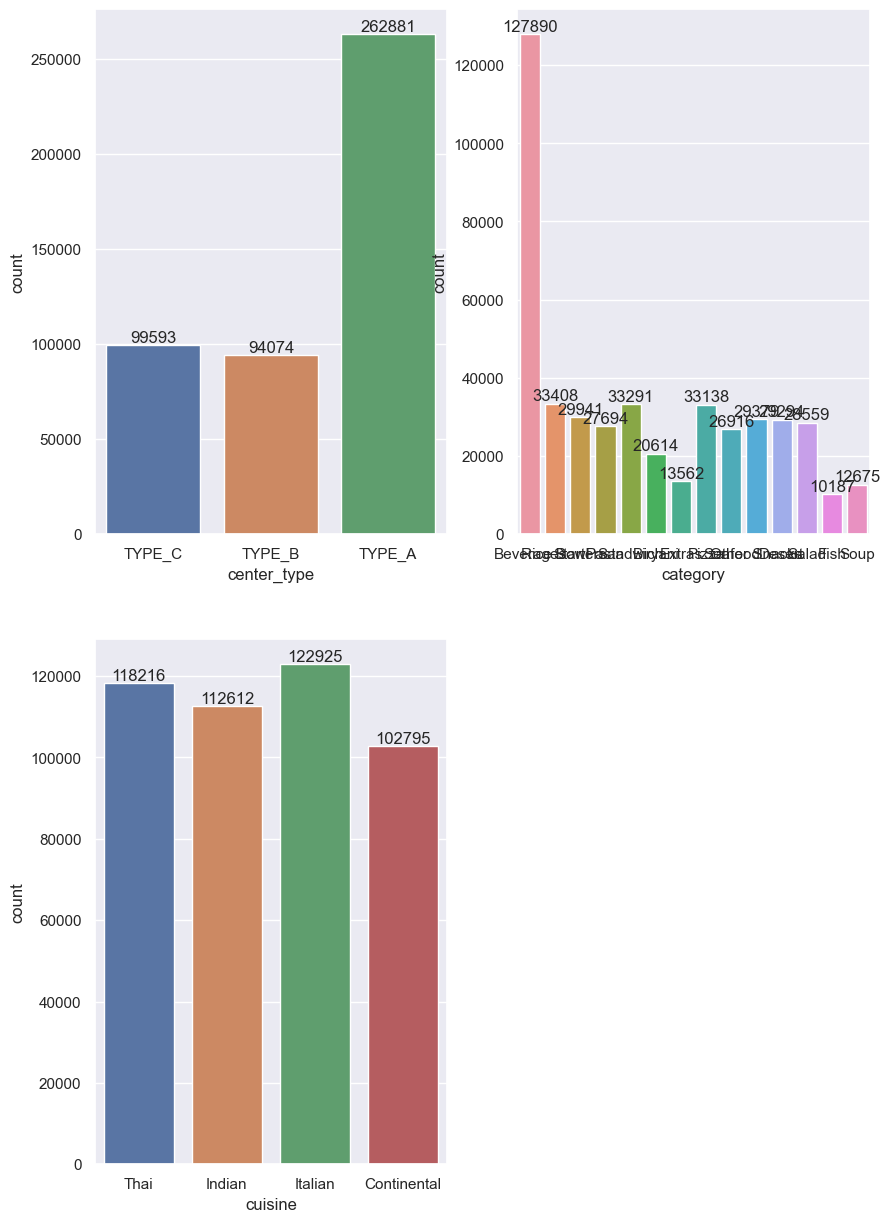

In [24]:
plt.figure(figsize=(10,15))
for i,column in enumerate(cat):
    plt.subplot(2,2,i+1)

    ax=sns.countplot(data=dff,x=column)
    ax.bar_label(ax.containers[0])
plt.show()

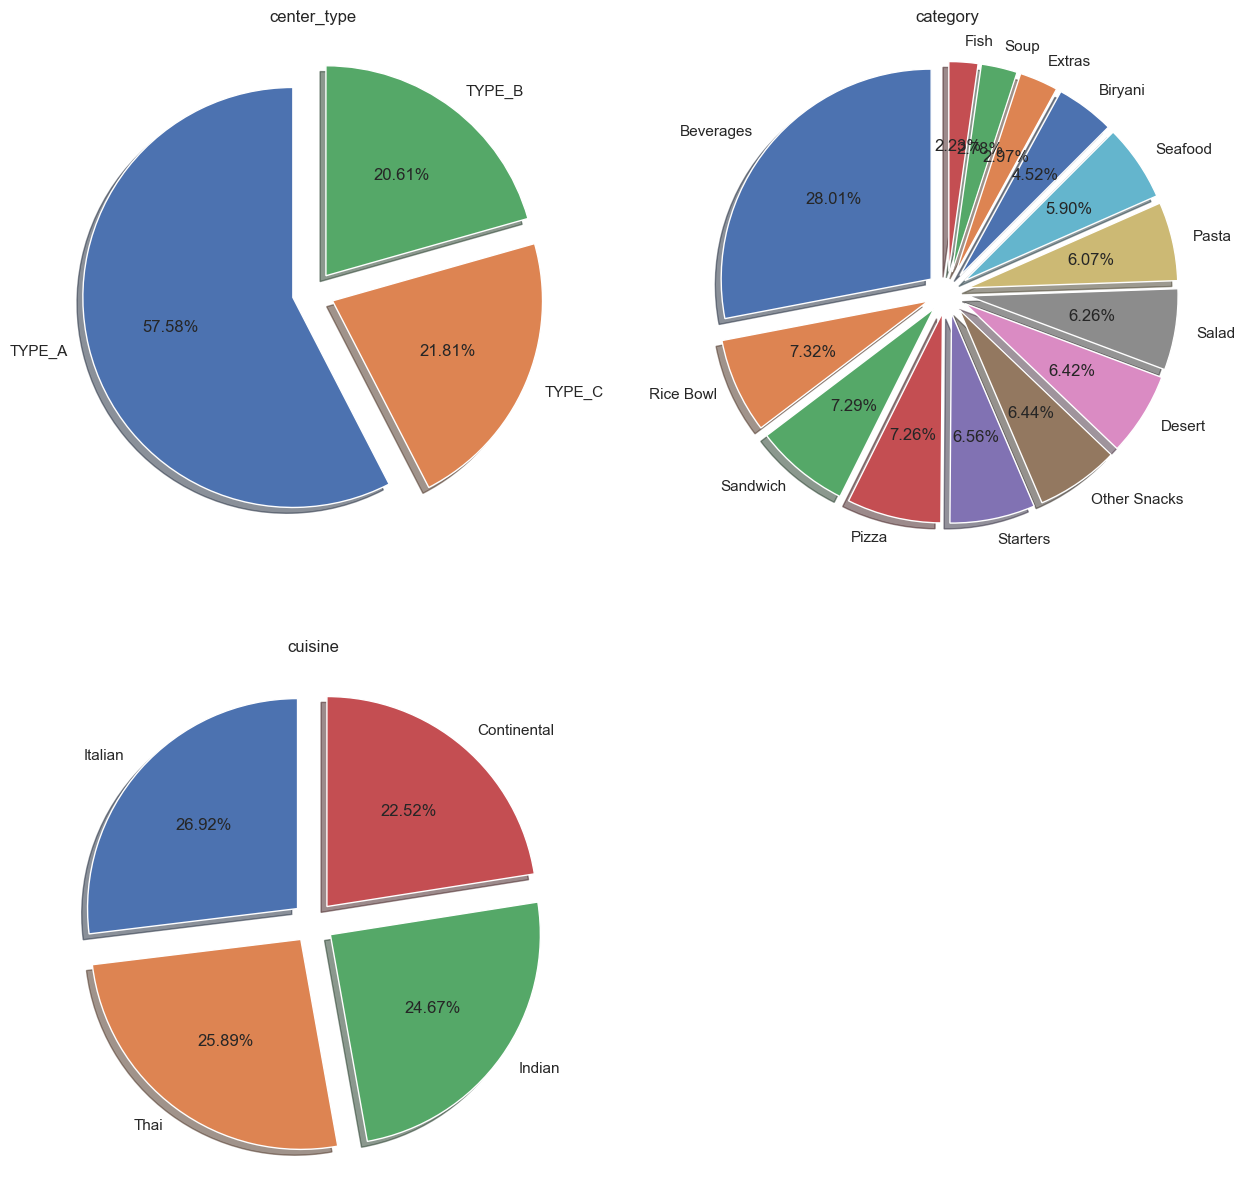

In [25]:
plt.figure(figsize=(15,15))
for i,column in enumerate(cat):
    plt.subplot(2,2,i+1)
    dff[column].value_counts()
    Property=dff[column].value_counts(normalize=True).keys()
    count=dff[column].value_counts(normalize=True).values
    Data=pd.DataFrame(zip(Property,count),columns=[column,'Count'])
    n=dff[column].nunique()
    l=[0.1 for i in range(n)]
    plt.title(column)
    plt.pie(x=count,labels=Property,autopct='%0.2f%%',shadow=True,radius=1,startangle=90,explode=l)
plt.show()

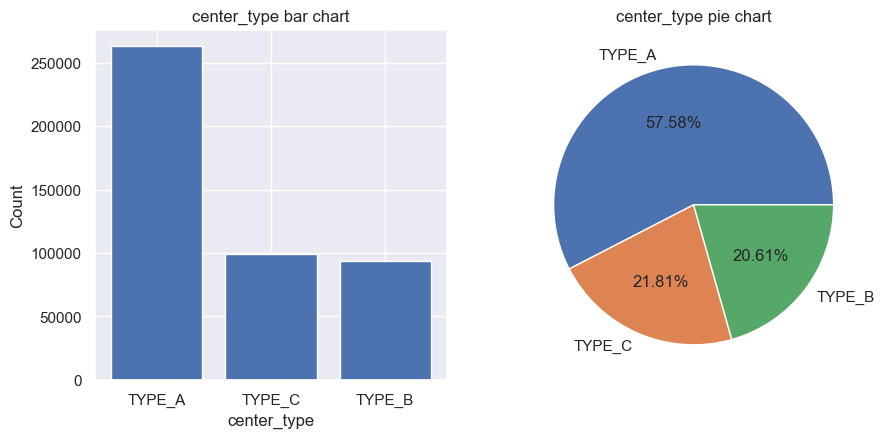

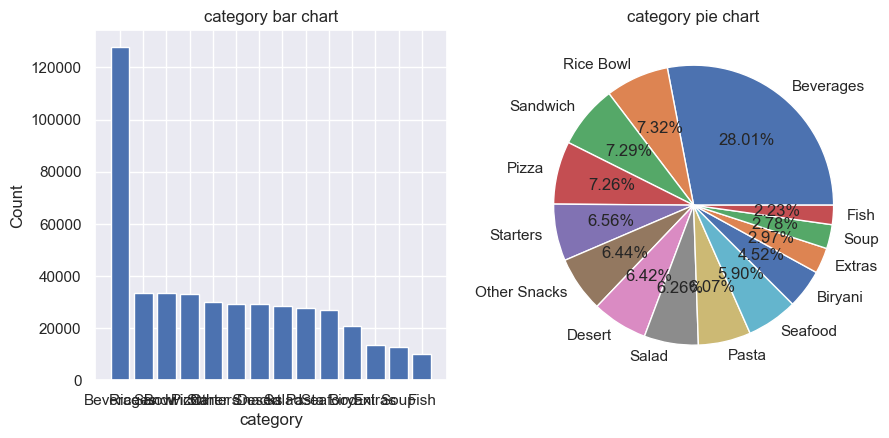

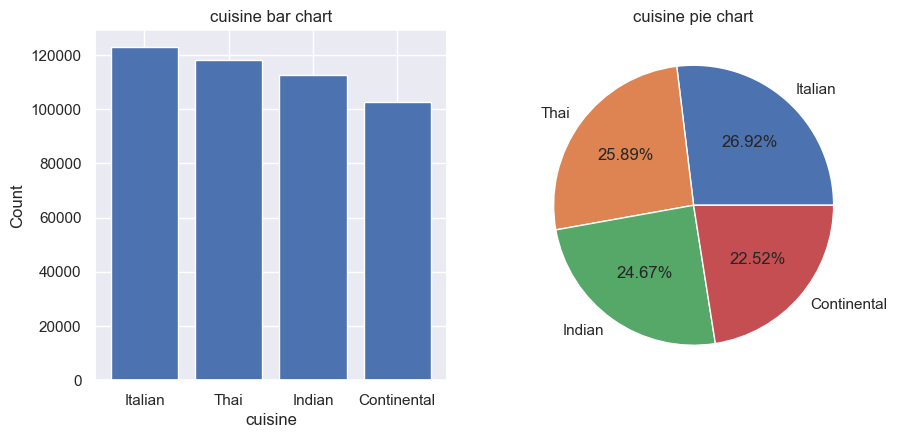

In [26]:
for column in cat:
    
    dff[column].value_counts()
    Property=dff[column].value_counts().keys()
    count=dff[column].value_counts().values
    Data=pd.DataFrame(zip(Property,count),columns=[column,'Count'])
    Data
    
    plt.figure(figsize=(10,10))
    
    plt.subplot(2,2,1)
    plt.title(f'{column} bar chart')
    plt.bar(column,'Count',data=Data)
    
    plt.xlabel(column)
    plt.ylabel('Count')
    
   
    plt.subplot(2,2,2)
    plt.title(f'{column} pie chart')
    plt.pie(x=count,labels=Property,autopct='%0.2f%%')
    
    plt.show()

In [27]:
for i in num:
    d_count=round(dff[i].count(),2)
    d_max=round(dff[i].max(),2)
    d_min=round(dff[i].min(),2)
    d_mean=round(dff[i].mean(),2)
    d_median=round(dff[i].median(),2)
    d_std=round(dff[i].std(),2)

    print(i,'count:',d_count)
    print(i,'max:',d_max)
    print(i,'min:',d_min)
    print(i,'mean:',d_mean)
    print(i,'median:',d_median)
    print(i,'std:',d_std)
    print('------------------------------------')

week count: 456548
week max: 145
week min: 1
week mean: 74.77
week median: 76.0
week std: 41.52
------------------------------------
center_id count: 456548
center_id max: 186
center_id min: 10
center_id mean: 82.11
center_id median: 76.0
center_id std: 45.98
------------------------------------
meal_id count: 456548
meal_id max: 2956
meal_id min: 1062
meal_id mean: 2024.34
meal_id median: 1993.0
meal_id std: 547.42
------------------------------------
checkout_price count: 456548
checkout_price max: 866.27
checkout_price min: 2.97
checkout_price mean: 332.24
checkout_price median: 296.82
checkout_price std: 152.94
------------------------------------
base_price count: 456548
base_price max: 866.27
base_price min: 55.35
base_price mean: 354.16
base_price median: 310.46
base_price std: 160.72
------------------------------------
emailer_for_promotion count: 456548
emailer_for_promotion max: 1
emailer_for_promotion min: 0
emailer_for_promotion mean: 0.08
emailer_for_promotion median: 0.0

In [28]:
for i in num:
    q1=np.quantile(dff[i],0.25)
    q2=np.quantile(dff[i],0.50)
    q3=np.quantile(dff[i],0.75)
    print(i,'q1:',q1)
    print(i,'q2:',q2)
    print(i,'q3:',3)
    print('------------')

week q1: 39.0
week q2: 76.0
week q3: 3
------------
center_id q1: 43.0
center_id q2: 76.0
center_id q3: 3
------------
meal_id q1: 1558.0
meal_id q2: 1993.0
meal_id q3: 3
------------
checkout_price q1: 228.95
checkout_price q2: 296.82
checkout_price q3: 3
------------
base_price q1: 243.5
base_price q2: 310.46
base_price q3: 3
------------
emailer_for_promotion q1: 0.0
emailer_for_promotion q2: 0.0
emailer_for_promotion q3: 3
------------
homepage_featured q1: 0.0
homepage_featured q2: 0.0
homepage_featured q3: 3
------------
num_orders q1: 54.0
num_orders q2: 136.0
num_orders q3: 3
------------
city_code q1: 553.0
city_code q2: 596.0
city_code q3: 3
------------
region_code q1: 34.0
region_code q2: 56.0
region_code q3: 3
------------
op_area q1: 3.6
op_area q2: 4.0
op_area q3: 3
------------


In [29]:
dff.describe()

,week,center_id,meal_id,checkout_price,base_price,emailer_for_promotion,homepage_featured,num_orders,city_code,region_code,op_area
count,456548.000000,456548.000000,456548.000000,456548.000000,456548.000000,456548.000000,456548.00000,456548.000000,456548.000000,456548.000000,456548.000000
mean,74.768771,82.105796,2024.337458,332.238933,354.156627,0.081152,0.10920,261.872760,601.553399,56.614566,4.083590
std,41.524956,45.975046,547.420920,152.939723,160.715914,0.273069,0.31189,395.922798,66.195914,17.641306,1.091686
min,1.000000,10.000000,1062.000000,2.970000,55.350000,0.000000,0.00000,13.000000,456.000000,23.000000,0.900000
25%,39.000000,43.000000,1558.000000,228.950000,243.500000,0.000000,0.00000,54.000000,553.000000,34.000000,3.600000
50%,76.000000,76.000000,1993.000000,296.820000,310.460000,0.000000,0.00000,136.000000,596.000000,56.000000,4.000000
75%,111.000000,110.000000,2539.000000,445.230000,458.870000,0.000000,0.00000,324.000000,651.000000,77.000000,4.500000
max,145.000000,186.000000,2956.000000,866.270000,866.270000,1.000000,1.00000,24299.000000,713.000000,93.000000,7.000000


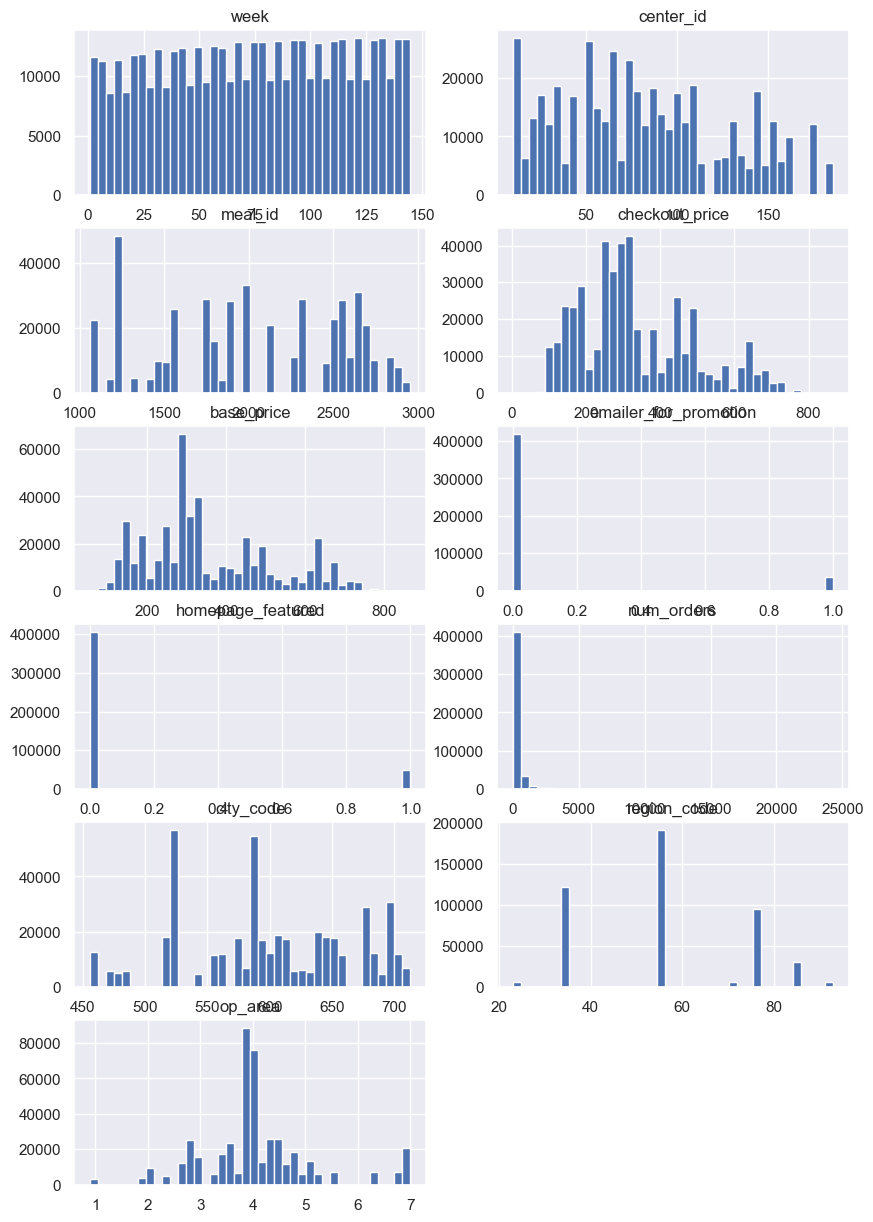

In [30]:
plt.figure(figsize=(10,15))
for i,column in enumerate(num):
    plt.subplot(6,2,i+1)
    plt.title(column)
    plt.hist(dff[column],bins=40)
plt.show()

In [31]:
for i in (num):
    print(i,dff[i].skew())

week -0.049517056218863834
center_id 0.3451302149651215
meal_id -0.1728841267542803
checkout_price 0.6723299047159742
base_price 0.6376608741298384
emailer_for_promotion 3.0677132882800637
homepage_featured 2.5060216260361274
num_orders 6.929966065342174
city_code -0.20913133192232275
region_code 0.056253808979281415
op_area 0.6644136146523569


In [32]:
num

Index(['week', 'center_id', 'meal_id', 'checkout_price', 'base_price',
       'emailer_for_promotion', 'homepage_featured', 'num_orders', 'city_code',
       'region_code', 'op_area'],
      dtype='object')

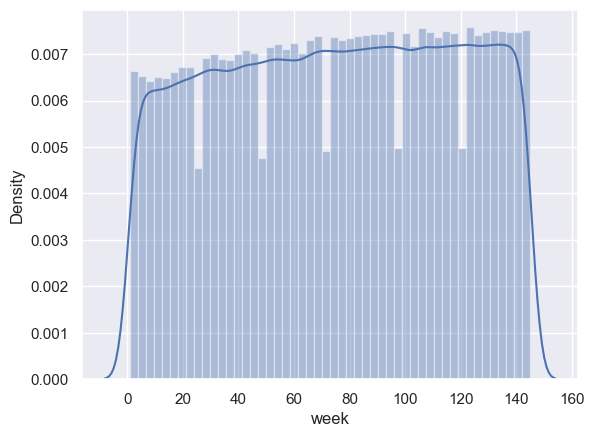

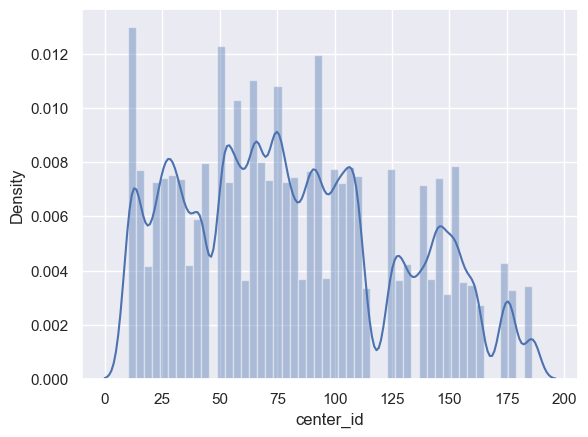

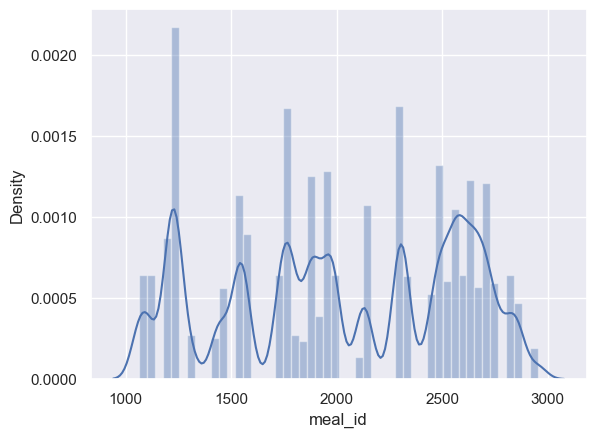

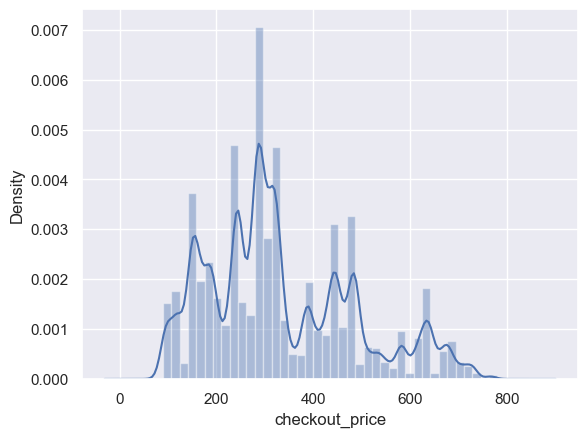

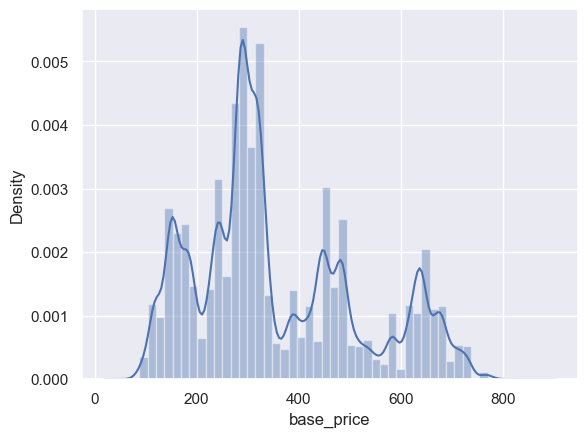

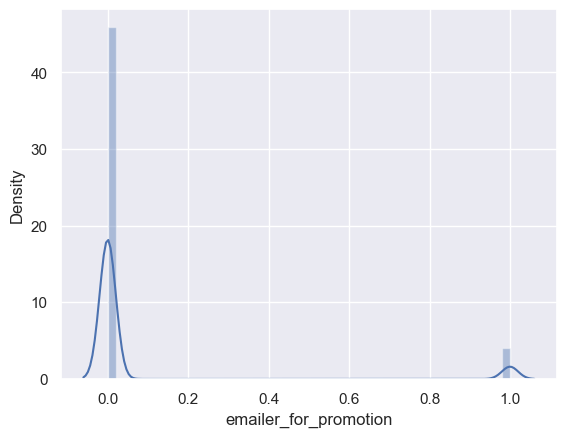

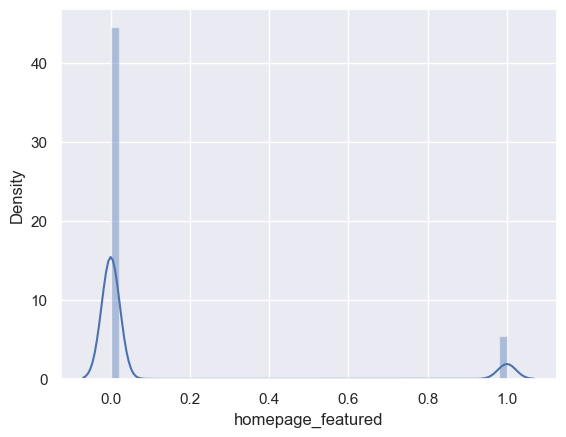

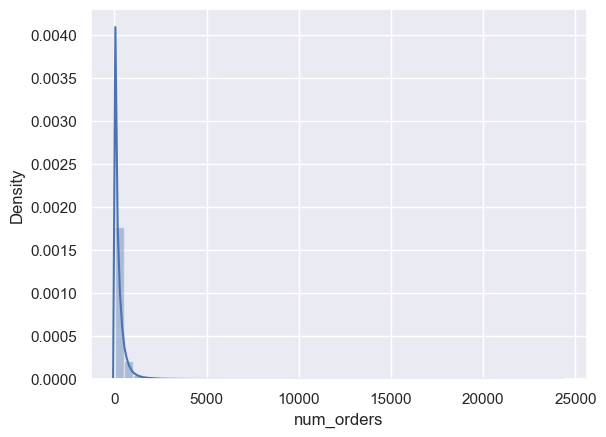

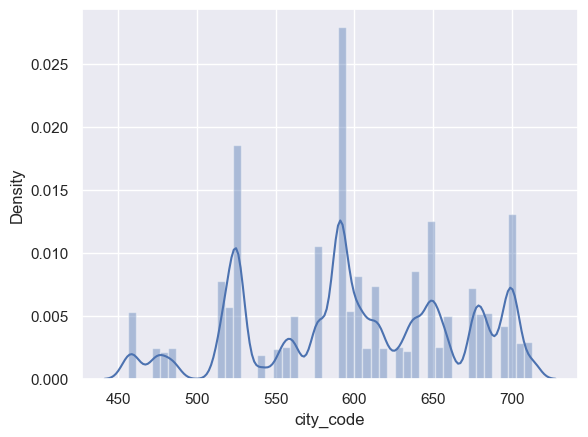

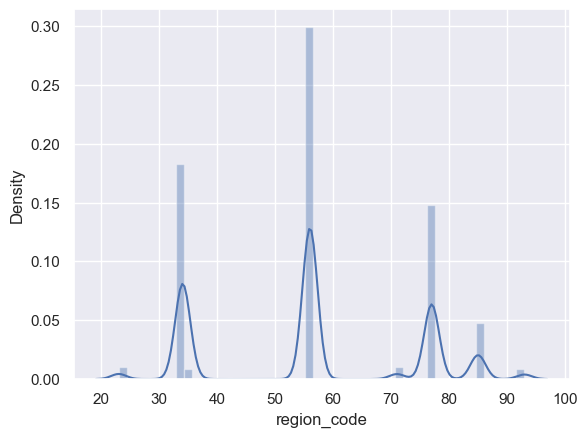

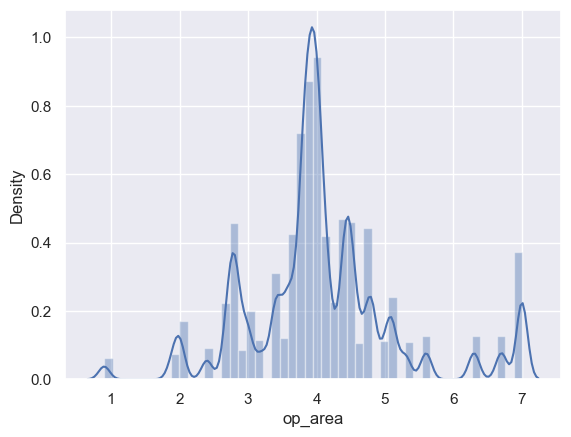

In [33]:
for i in num:
    sns.distplot(dff[i])
    plt.show()

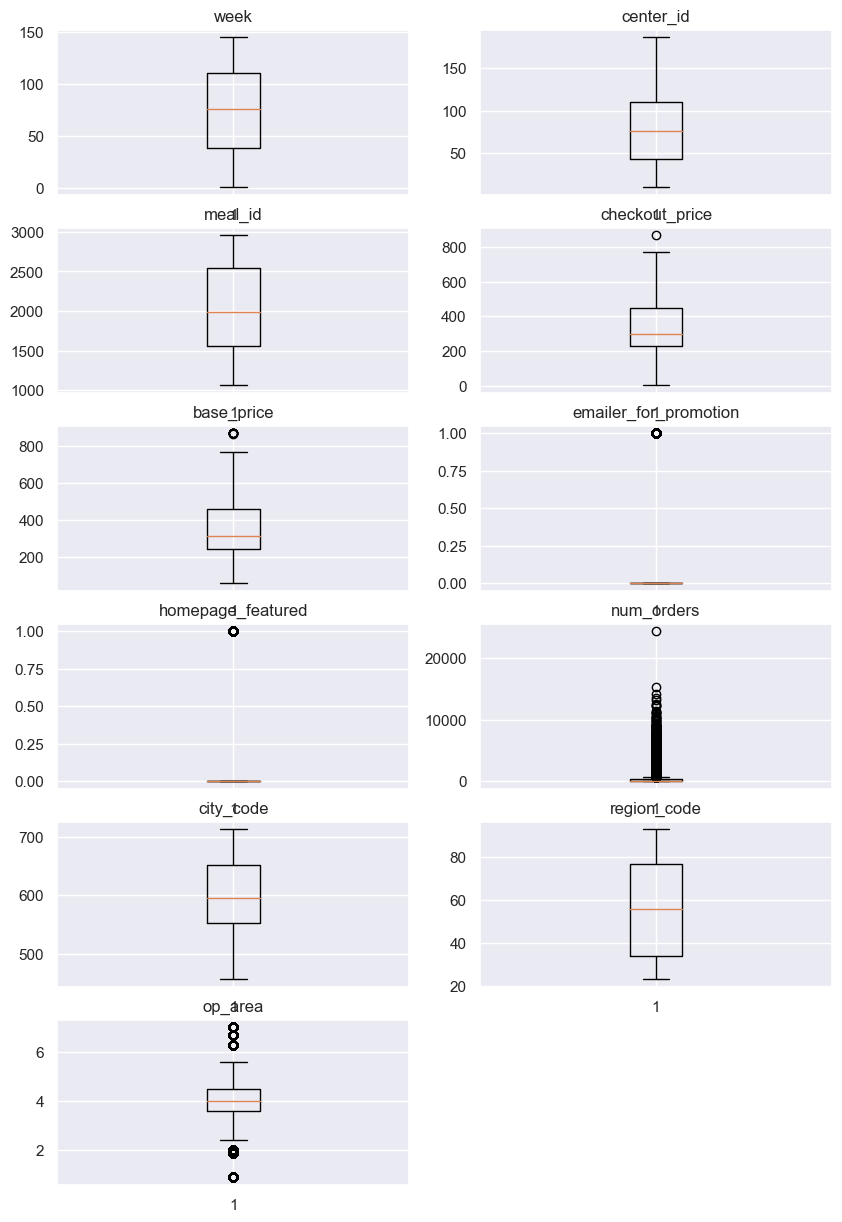

In [34]:
plt.figure(figsize=(10,15))
for i,column in enumerate(num):
    plt.subplot(6,2,i+1)
    plt.title(column)
    plt.boxplot(dff[column])
plt.show()

In [35]:
num

Index(['week', 'center_id', 'meal_id', 'checkout_price', 'base_price',
       'emailer_for_promotion', 'homepage_featured', 'num_orders', 'city_code',
       'region_code', 'op_area'],
      dtype='object')

In [36]:
q1=np.quantile(dff['checkout_price'],0.25)
q2=np.quantile(dff['checkout_price'],0.50)
q3=np.quantile(dff['checkout_price'],0.75)

iqr=q3-q1

ub1=q3+(1.5*iqr)
lb1=q1-(1.5*iqr)

con1=dff['checkout_price']>ub1
con2=dff['checkout_price']<lb1
outlier=dff[con1|con2]
len(outlier)

1

In [37]:
v=(len(outlier)/len(dff))*100
v

0.00021903501931888869

In [38]:
q1=np.quantile(dff['num_orders'],0.25)
q2=np.quantile(dff['num_orders'],0.50)
q3=np.quantile(dff['num_orders'],0.75)

iqr=q3-q1

ub2=q3+(1.5*iqr)
lb2=q1-(1.5*iqr)

con1=dff['num_orders']>ub2
con2=dff['num_orders']<lb2
outlier1=dff[con1|con2]
len(outlier1)

32937

In [39]:
v1=(len(outlier1)/len(dff))*100
v1

7.214356431306237

In [40]:
q1=np.quantile(dff['op_area'],0.25)
q2=np.quantile(dff['op_area'],0.50)
q3=np.quantile(dff['op_area'],0.75)

iqr=q3-q1

ub3=q3+(1.5*iqr)
lb3=q1-(1.5*iqr)

con1=dff['op_area']>ub3
con2=dff['op_area']<lb3
outlier2=dff[con1|con2]
len(outlier2)

51774

In [41]:
v2=(len(outlier2)/len(dff))*100
v2

11.340319090216145

In [42]:
q1=np.quantile(dff['op_area'],0.25)
q2=np.quantile(dff['op_area'],0.50)
q3=np.quantile(dff['op_area'],0.75)

iqr=q3-q1

ub3=q3+(1.5*iqr)
lb3=q1-(1.5*iqr)

con1=dff['op_area']<ub3
con2=dff['op_area']>lb3
non_outlier2=dff[con1&con2]
len(non_outlier2)

404774

In [43]:
cat

Index(['center_type', 'category', 'cuisine'], dtype='object')

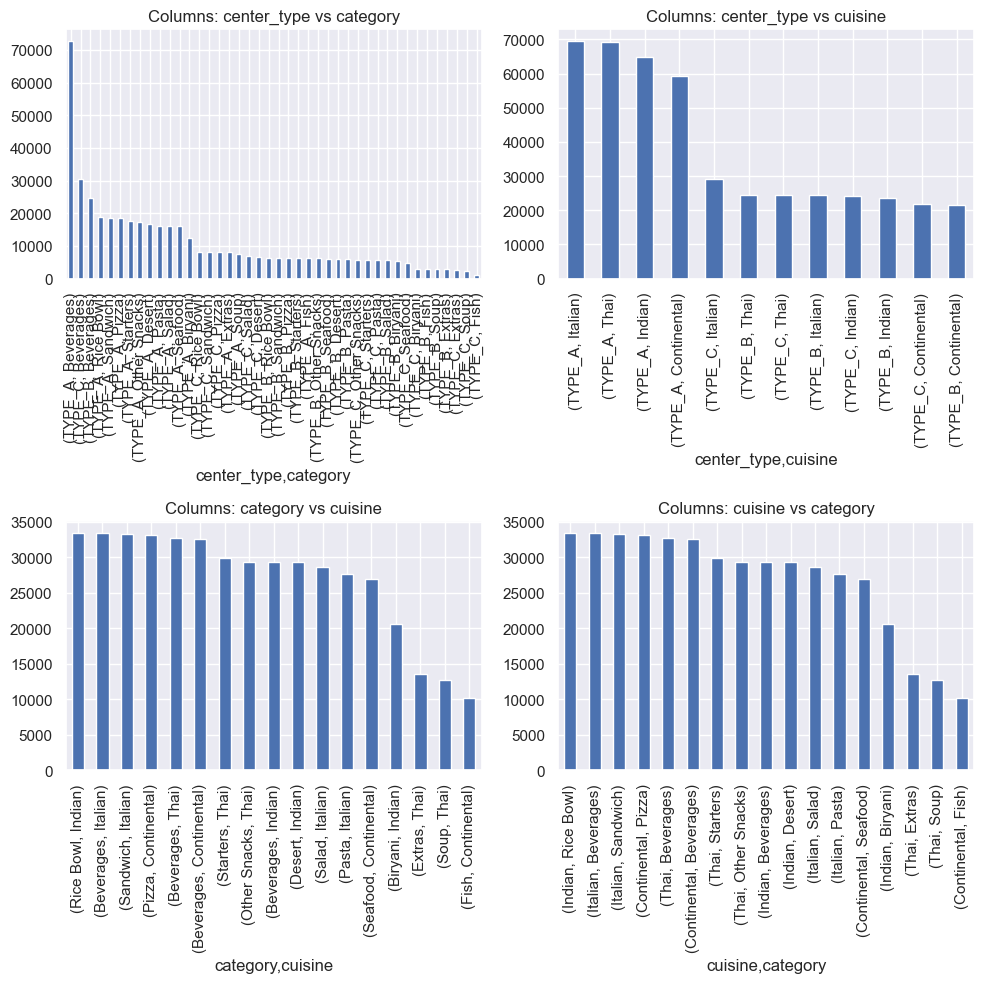

In [44]:
import matplotlib.pyplot as plt

# Assuming total_plots is the total number of subplots you want to create
total_plots = 4
plot_counter=0

# Assuming you have already created the figure and have a list of categories 'cat'
fig, axes = plt.subplots(total_plots // 2, 2, figsize=(10, 10))

# Assuming 'cat' is a list of categories
for i in cat:
    for j in cat[1:]:
        if i != j and plot_counter < total_plots:  
            ax = axes[plot_counter // 2, plot_counter % 2]  
            dff[[i, j]].value_counts().plot(kind='bar', ax=ax)
            ax.set_title(f'Columns: {i} vs {j}')
            plot_counter += 1

plt.tight_layout()
plt.show()


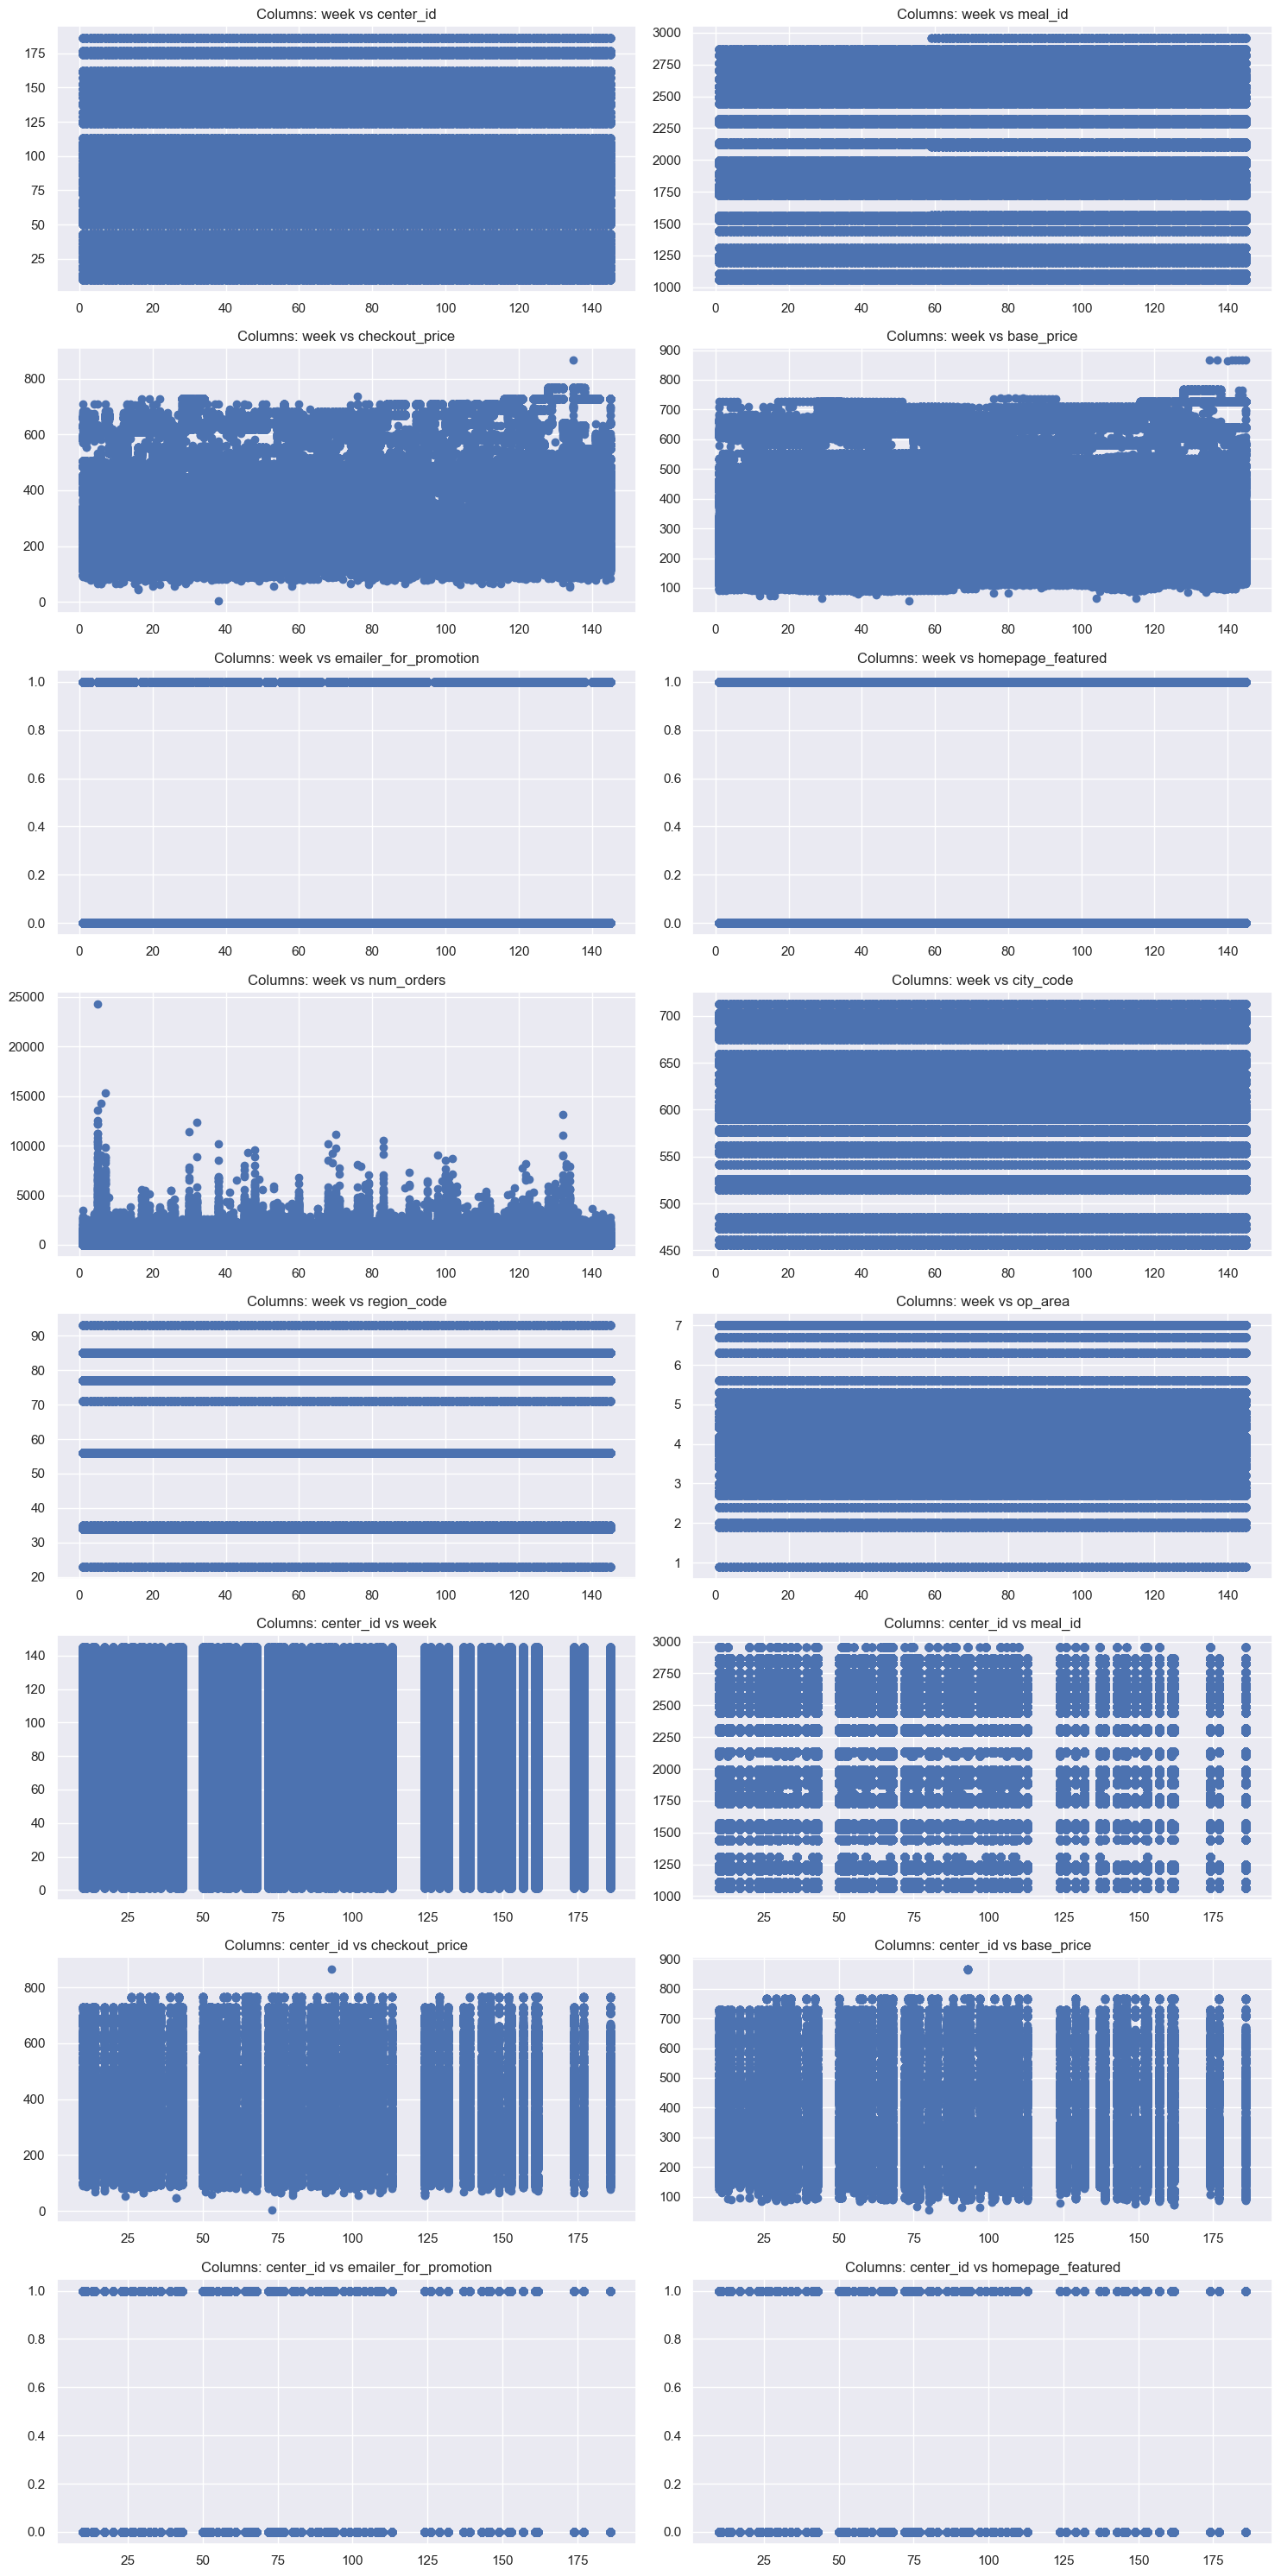

In [45]:
import matplotlib.pyplot as plt

# Calculate the total number of plots (rows * columns)
total_plots = 8 * 2

# Create a figure and axes for the subplots
fig, axes = plt.subplots(8, 2, figsize=(15, 30))  # 5 rows, 4 columns - Adjust the figsize as needed

# Your existing code with minor modifications
plot_counter = 0  # Initialize a counter for subplot positions

for i in num:
    for j in num:
        if i != j and plot_counter < total_plots:  # Check if plot_counter exceeds total_plots
            ax = axes[plot_counter // 2, plot_counter % 2]  # Get the current subplot
            ax.scatter(dff[i], dff[j])
            ax.set_title(f'Columns: {i} vs {j}')
            plot_counter += 1  # Increment the plot counter

# Adjust layout and display the plots
plt.tight_layout()
plt.show()

In [46]:
corr=dff.corr(numeric_only=True)
corr

,week,center_id,meal_id,checkout_price,base_price,emailer_for_promotion,homepage_featured,num_orders,city_code,region_code,op_area
week,1.000000,-0.003450,0.019814,0.026581,0.028614,-0.000841,-0.008263,-0.017210,0.000405,0.004600,0.001550
center_id,-0.003450,1.000000,0.009893,0.001348,0.000604,0.013658,-0.005043,-0.053035,0.061078,-0.003426,-0.111869
meal_id,0.019814,0.009893,1.000000,0.010748,0.002605,0.013402,0.016354,0.010597,-0.003198,-0.001662,-0.001546
checkout_price,0.026581,0.001348,0.010748,1.000000,0.953389,0.004818,-0.057184,-0.282108,-0.004805,-0.003648,0.021569
base_price,0.028614,0.000604,0.002605,0.953389,1.000000,0.171173,0.057156,-0.222306,-0.002054,-0.001934,0.018031
emailer_for_promotion,-0.000841,0.013658,0.013402,0.004818,0.171173,1.000000,0.390534,0.277147,-0.005234,-0.007462,-0.019462
homepage_featured,-0.008263,-0.005043,0.016354,-0.057184,0.057156,0.390534,1.000000,0.294490,0.008640,0.003605,0.041498
num_orders,-0.017210,-0.053035,0.010597,-0.282108,-0.222306,0.277147,0.294490,1.000000,0.041596,0.029744,0.176976
city_code,0.000405,0.061078,-0.003198,-0.004805,-0.002054,-0.005234,0.008640,0.041596,1.000000,0.042686,0.131476
region_code,0.004600,-0.003426,-0.001662,-0.003648,-0.001934,-0.007462,0.003605,0.029744,0.042686,1.000000,0.023327


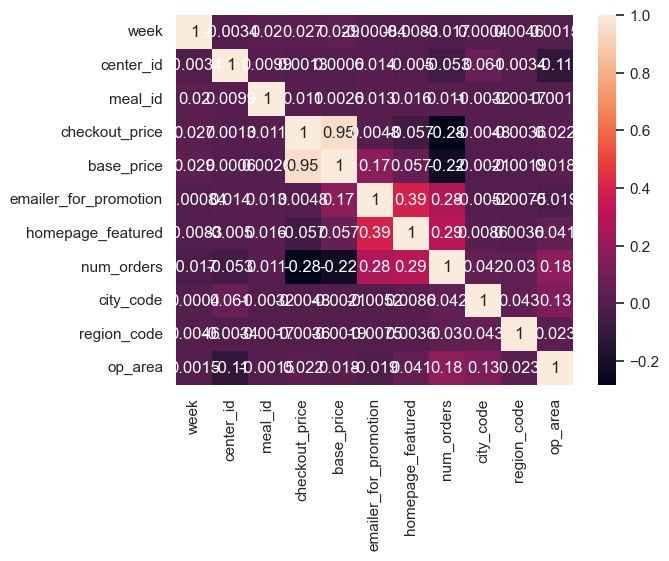

In [47]:
sns.heatmap(corr,annot=True)
plt.show()

In [48]:
for i in cat:
    from sklearn.preprocessing import LabelEncoder
    le=LabelEncoder()
    dff[i]=le.fit_transform(dff[i])

In [49]:
dff

,week,center_id,meal_id,checkout_price,base_price,emailer_for_promotion,homepage_featured,num_orders,city_code,region_code,center_type,op_area,category,cuisine
0,1,55,1885,136.83,152.29,0,0,177,647,56,2,2.0,0,3
1,2,55,1885,135.83,152.29,0,0,323,647,56,2,2.0,0,3
2,3,55,1885,132.92,133.92,0,0,96,647,56,2,2.0,0,3
3,4,55,1885,135.86,134.86,0,0,163,647,56,2,2.0,0,3
4,5,55,1885,146.50,147.50,0,0,215,647,56,2,2.0,0,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
456543,141,61,2104,583.03,630.53,0,1,13,473,77,0,4.5,4,0
456544,142,61,2104,581.03,582.03,0,0,42,473,77,0,4.5,4,0
456545,143,61,2104,583.03,581.03,0,0,40,473,77,0,4.5,4,0
456546,144,61,2104,582.03,581.03,0,0,53,473,77,0,4.5,4,0


In [50]:
X=dff.drop('num_orders',axis=1)
y=dff['num_orders']

In [51]:
from sklearn.model_selection import train_test_split

In [52]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=1234)

In [53]:
print(dff.shape)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(456548, 14)
(365238, 13)
(91310, 13)
(365238,)
(91310,)


# Linear Regression

In [54]:
from sklearn.linear_model import LinearRegression
lr=LinearRegression()
lr.fit(X_train,y_train)

LinearRegression()

In [55]:
y_pred=lr.predict(X_test)

In [56]:
y_pred

array([253.91807257, 290.61698836, 311.7723666 , ..., 390.82229063,
       742.81135071, 294.63876323])

In [57]:
y_test[:6].values,y_pred[:6]

(array([ 203,  379,  514,   42, 1066,   27], dtype=int64),
 array([253.91807257, 290.61698836, 311.7723666 , -17.19926971,
        697.50150803, 107.94847449]))

In [58]:
from sklearn.metrics import mean_absolute_error,r2_score,mean_squared_error

In [59]:
mean_absolute_error1=mean_absolute_error(y_test,y_pred)
mean_square_error1=mean_squared_error(y_test,y_pred)
R2_score1=r2_score(y_test,y_pred)

In [60]:
print('mean_absolute_error1',mean_absolute_error1)
print('mean_square_error1',mean_square_error1)
print('R2_score1',R2_score1)

mean_absolute_error1 194.77364942150174
mean_square_error1 119804.90514195172
R2_score1 0.24419060776896073


# Decision Tree

In [61]:
from sklearn.tree import DecisionTreeRegressor
dtree=DecisionTreeRegressor()
dtree.fit(X_train,y_train)

DecisionTreeRegressor()

In [62]:
y_pred_dt=dtree.predict(X_test)

In [63]:
y_pred_dt

array([ 95., 283., 609., ..., 121., 906., 836.])

In [64]:
y_test[:6].values,y_pred_dt[:6]

(array([ 203,  379,  514,   42, 1066,   27], dtype=int64),
 array([ 95., 283., 609.,  55., 730.,  27.]))

In [65]:
mean_absolute_error2=mean_absolute_error(y_test,y_pred_dt)
mean_square_error2=mean_squared_error(y_test,y_pred_dt)
R2_score2=r2_score(y_test,y_pred_dt)

In [66]:
print('mean_absolute_error2',mean_absolute_error2)
print('mean_square_error2',mean_square_error2)
print('R2_score2',R2_score2)

mean_absolute_error2 90.6066586354178
mean_square_error2 40887.725156061766
R2_score2 0.7420529095758075


# Random Forest

In [67]:
from sklearn.ensemble import RandomForestRegressor
RF=RandomForestRegressor()
RF.fit(X_train,y_train)

RandomForestRegressor()

In [68]:
y_pred_RF=RF.predict(X_test)

In [69]:
y_pred_RF

array([186.66, 295.94, 507.1 , ..., 125.55, 919.12, 872.5 ])

In [70]:
y_test[:6].values,y_pred_RF[:6]

(array([ 203,  379,  514,   42, 1066,   27], dtype=int64),
 array([186.66, 295.94, 507.1 ,  39.67, 696.63,  29.82]))

In [71]:
mean_absolute_error3=mean_absolute_error(y_test,y_pred_RF)
mean_square_error3=mean_squared_error(y_test,y_pred_RF)
R2_score3=r2_score(y_test,y_pred_RF)

In [72]:
print('mean_absolute_error3',mean_absolute_error3)
print('mean_square_error3',mean_square_error3)
print('R2_score3',R2_score3)

mean_absolute_error3 67.92686989376848
mean_square_error3 21743.486389763442
R2_score3 0.862827559407863


# KNN

In [73]:
from sklearn.neighbors import KNeighborsRegressor
KN=KNeighborsRegressor()
KN.fit(X_train,y_train)

KNeighborsRegressor()

In [74]:
y_pred_KN=KN.predict(X_test)

In [75]:
y_pred_KN

array([232.4, 311. , 572.6, ...,  83.6, 885.8, 834. ])

In [76]:
y_test[:6].values,y_pred_KN[:6]

(array([ 203,  379,  514,   42, 1066,   27], dtype=int64),
 array([232.4, 311. , 572.6,  32.8, 597.2,  32.8]))

In [77]:
mean_absolute_error4=mean_absolute_error(y_test,y_pred_KN)
mean_square_error4=mean_squared_error(y_test,y_pred_KN)
R2_score4=r2_score(y_test,y_pred_KN)

In [78]:
print('mean_absolute_error4',mean_absolute_error4)
print('mean_square_error4',mean_square_error4)
print('R2_score4',R2_score4)

mean_absolute_error4 86.8578403241704
mean_square_error4 46981.49434629285
R2_score4 0.703609341821986


In [79]:
dic1={'Mean absolute Error':[mean_absolute_error1,mean_absolute_error2,mean_absolute_error3,mean_absolute_error4],
     'Mean Square Error':[mean_square_error1,mean_square_error2,mean_square_error3,mean_square_error4],
     'R2 Score':[R2_score1,R2_score2,R2_score3,R2_score4]}
pd.DataFrame(dic1,index=['Linear Regression','Decision Tree','Random Forest','KNN'])

,Mean absolute Error,Mean Square Error,R2 Score
Linear Regression,194.773649,119804.905142,0.244191
Decision Tree,90.606659,40887.725156,0.742053
Random Forest,67.926870,21743.486390,0.862828
KNN,86.857840,46981.494346,0.703609


In [85]:
import pickle
pickle.dump(KN,open("food_.Best","wb"))

In [86]:
pwd

'C:\\Users\\abhin\\Documents\\Food prediction Model'

In [87]:
y_pred_KN

array([232.4, 311. , 572.6, ...,  83.6, 885.8, 834. ])

In [88]:
y_pred_KN,y_test.values

(array([232.4, 311. , 572.6, ...,  83.6, 885.8, 834. ]),
 array([203, 379, 514, ...,  96, 703, 878], dtype=int64))

In [89]:
dff

,week,center_id,meal_id,checkout_price,base_price,emailer_for_promotion,homepage_featured,num_orders,city_code,region_code,center_type,op_area,category,cuisine
0,1,55,1885,136.83,152.29,0,0,177,647,56,2,2.0,0,3
1,2,55,1885,135.83,152.29,0,0,323,647,56,2,2.0,0,3
2,3,55,1885,132.92,133.92,0,0,96,647,56,2,2.0,0,3
3,4,55,1885,135.86,134.86,0,0,163,647,56,2,2.0,0,3
4,5,55,1885,146.50,147.50,0,0,215,647,56,2,2.0,0,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
456543,141,61,2104,583.03,630.53,0,1,13,473,77,0,4.5,4,0
456544,142,61,2104,581.03,582.03,0,0,42,473,77,0,4.5,4,0
456545,143,61,2104,583.03,581.03,0,0,40,473,77,0,4.5,4,0
456546,144,61,2104,582.03,581.03,0,0,53,473,77,0,4.5,4,0
